In [1]:
from IPython.display import HTML
%matplotlib inline

# Introduction to Bayesian Inference: A Coin Flipping Example 

This tutorial provides a short introduction to Bayesian inference.

In general, statistical inference is the process of determining properties of a model/distribution given some data. Bayesian inference can be seen as the Bayesian counterpart to frequentist inference. In frequentist inference,
there is usually the notion of some true, unknown, parameter which is a constant and point estimates are inferred from data.
Contrary, Bayesian inference treats the model parameters as random variables and usually wants to deduce probabilistic statements about the distribution of parameters. For a more thorough discussion about the differences between frequentist and Bayesian statistics, please refer to the following [blog post](http://jakevdp.github.io/blog/2014/03/11/frequentism-and-bayesianism-a-practical-intro/) by Jake Vanderplas.
 


Bayesian inference utilizes the famous Bayes rule:

$$
 P(A|B) = \frac{P(B | A) P(A)}{P(B)}
$$

For model based inference, we can replace $A$ with the parameters $\theta$ and $B$ with the data $D$ at interest. Furthermore, we can introduce $I$ which can be used to introduce an additional assumption (knowledge) to the inference such as which model to use.

$$
 \overbrace{P(\theta| D, I)}^{\text{posterior}} = \frac{\overbrace{P(D | \theta, I)}^{\text{likelihood}}\overbrace{P(\theta|I)}^{\text{prior}}}{\underbrace{P(D|I)}_{\text{marginal likelihood}}}
$$

The prior distribution $P(\theta|I)$ specifies our assumption about the parameters $\theta$  before taking the data into account. The likelihood $P(D | \theta, I)$ represents the probability of the data if the parameters $\theta$ are specified. The marginal likelihood (or evidence) $P(D|I)$ is the distribution of the data $D$ given our additional assumption $I$. It is the normalization of the Bayes rule and plays an important rule for model comparison. Finally, the posterior $P(\theta| D, I)$ is the distribution of the parameters after taking the observed data $D$ and our additional (prior) assumption $I$ into account. We can also say that the posterior is proportional to the likelihood and the prior.

$$
posterior \propto likelihood \times prior
$$

## Example: coin flip

### Introduction

For better understanding of Bayesian inference let us consider the classic <a href="http://www.behind-the-enemy-lines.com/2008/01/are-you-bayesian-or-frequentist-or.html">coin flip example</a>.

We are observing whether a coin flip results in "heads" or "tails". We are not sure whether the coin at interest is fair or whether it might be biased due to some asperity or similar things. Thus, we want to conduct statistical inference of the parameter $p$, which should describe the probability of flipping "heads", by utilizing the Bayesian framework. The probability of flipping "tails" is simply $1-p$. Further, we consider a set of observations $D$ by flipping the coin several times. Thus, by applying Bayes inference, we want to determine:

$$
P(p|D) \propto P(D|p) \times P(p)
$$

### Model

As underlying model, we can use the binomial distribution which is a discrete probability distribution for the number of successes in a sequence of n independent binary experiments (e.g., coin flips resulting in "heads" or "tails"). The binomial distribution is conditioned on the parameters $n$ (number of trials) and $p$ the probability of flipping "heads". The probability mass function of the binomial distribution---which determines the probability of observing $k$ "heads" with parameters $p$ and $n$---is defined as:

$$
f(k|p,n) = \binom nk p^k (1-p)^{n-k}
$$
We can rewrite above Bayes rules as:

$$
P(p|k,n) \propto P(k|p,n) \times P(p)
$$

### Prior

We know how we can calculate the likelihood based on the PMF of the binomial distribution. But, how can we now use the prior? As mentioned, the prior is our belief in the parameter(s) before observing the data. So basically, we can express our assumption about the parameter $p$ in our model in the form of another probability distribution. In case of the binomial distribution as likelihood, we can use the Beta distribution as a  <a href="https://en.wikipedia.org/wiki/Conjugate_prior">conjugate prior</a>. This means that also the posterior distribution will be of the same family (i.e., Beta distribution) as the prior distribution.

The beta distribution is a continuous probability distribution over the interval $[0,1]$. The PDF of the Beta distribution is defined as:

$$
f(x|\alpha,\beta) =  \frac{1}{B(\alpha,\beta)} x^{\alpha-1}(1-x)^{\beta-1} =  \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\, x^{\alpha-1}(1-x)^{\beta-1}
$$

$B$ is the <a href="https://en.wikipedia.org/wiki/Beta_function">beta function</a> and is a normalization constant to ensure that the probability integrates to 1. $\Gamma$ is the <a href="https://en.wikipedia.org/wiki/Gamma_function">gamma function</a>.

$\alpha$ and $\beta$ are positive shape parameters controlling the shape of the distribution. If they are $>=1$, we can think of them as pseudo counts; i.e., counts before observing the data. So for our example, this would mean that $\alpha$ would specify the pseudo counts of observing a "heads" flip, while $\beta$ would refer to the counts of observing a "tails" flip. The Wikipedia page of the <a href="https://en.wikipedia.org/wiki/Beta_distribution#Shapes">Beta distribution</a> goes into detail about the behavior of the shape parameters.

For a better understanding, let us visualize some examples next for the case of $\alpha >= 1$ and $\beta >= 1$. 

In [2]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np

# helper function for plotting
def plot_beta(a,b,ax, print_interval=True):
    ax.set_xlabel("p")
    ax.set_ylabel("probability density")
    x = np.linspace(0.00,1, 100)
    label = "$\\alpha= " + str(a) + ", \\beta=" + str(b) + "$"
    dist = beta(a,b)
    # plot density
    ax.plot(x, dist.pdf(x),
            lw=2, alpha=0.6, label=label)
    # determine the 95% HDI
    if print_interval:
        print("Interval containing 95% of the distribution: ", dist.interval(0.95))

Let us consider a symmetric Beta distribution. This means that we want to express our prior belief that the coin is fair. We can express this prior with the shape parameters $\alpha$ and $\beta$ which we can interpret as pseudo counts. As we have a fair belief, we set both shape parameters to the same value. Let us start with $\alpha=\beta=10$.

Interval containing 95% of the distribution:  (0.28864324791699886, 0.7113567520830011)


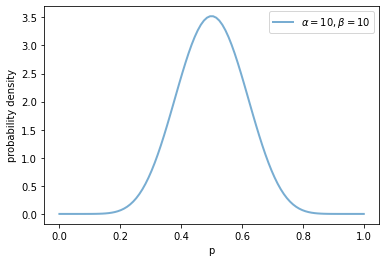

In [3]:
fig, ax = plt.subplots(1,1)
plot_beta(10,10,ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels);

What we can see is the PDF of the Beta distribution with our given shape parameters. We can see that the parameter $p=0.5$ receives the highest density. However, as we keep our pseudo counts relatively low, we also allow other parameter configurations to receive a certain density. If we determine the interval containing 95% of the distribution, we receive $0.29$ as the lower and $0.71$ as the upper boundary.

Interval containing 95% of the distribution:  (0.43095093094181725, 0.5690490690581828)


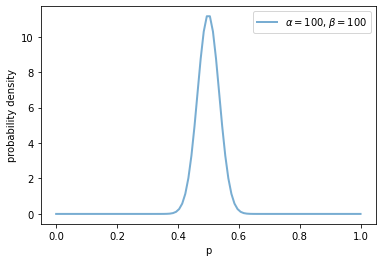

In [4]:
fig, ax = plt.subplots(1,1)
plot_beta(100,100,ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels);

If we increase our symmetric shape parameters to a value of $100$, we can see a much higher density for parameters around the fair probability of $0.5$. The 95% highest density interval now lies between $0.43$ and $0.71$.

Interval containing 95% of the distribution:  (0.4780947196206835, 0.5219052803793165)


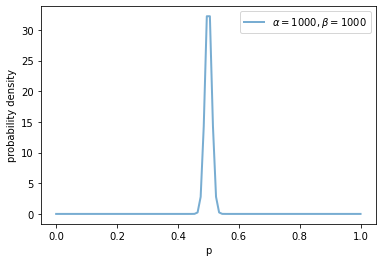

In [5]:
fig, ax = plt.subplots(1,1)
plot_beta(1000,1000,ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels);

By further increasing the pseudo counts, we can further increase our "fair" coin belief.

Next, let us also shortly consider non-symmetric shape parameters (but let us still follow the pseudo count interpretation and thus, only use parameters larger than one).

Interval containing 95% of the distribution:  (0.6915028921812392, 0.9974714214555382)


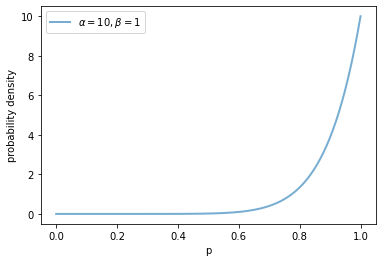

In [6]:
fig, ax = plt.subplots(1,1)
plot_beta(10,1,ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels);

Setting $\alpha=10$ and $\beta=1$ increases the belief in an unfair coin biased towards flipping "heads". Finally, let us shortly consider what happens when we set $\alpha=\beta=1$.

Interval containing 95% of the distribution:  (0.025000000000000022, 0.975)


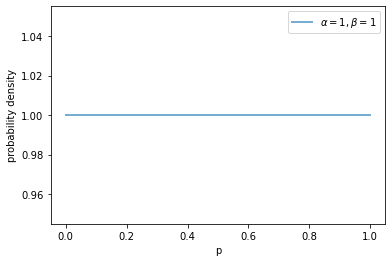

In [7]:
fig, ax = plt.subplots(1,1)
plot_beta(1,1,ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels);

We can see that we now have a flat prior, meaning that all parameter configurations are equally likely. I suggest to play around with the shape parameters to see what happens with other configurations; also try to set the parameters lower than one.